In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data
path = "/Users/Glebazzz/Jupiter/04.25 Instacart Basket Analysis" 
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'orders_merged_customers.pkl'))

<Axes: xlabel='orders_day_of_week'>

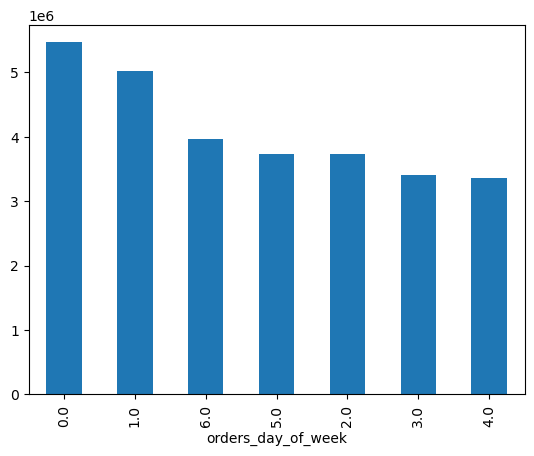

In [3]:
#Create bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

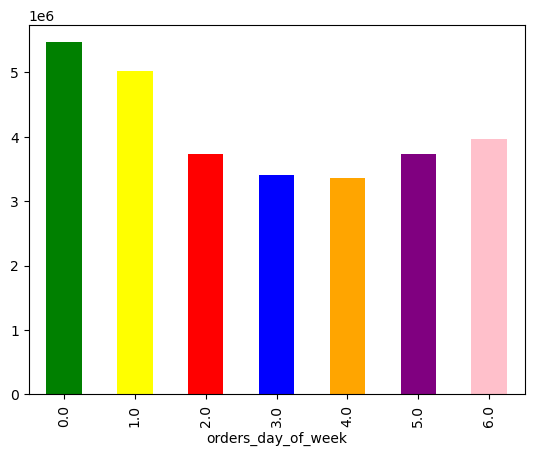

In [4]:
# sort bars add colour
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['green', 'yellow', 'red', 'blue', 'orange', 'purple', 'pink'])

In [5]:
# save chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_orders_dow.png'))

#### Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

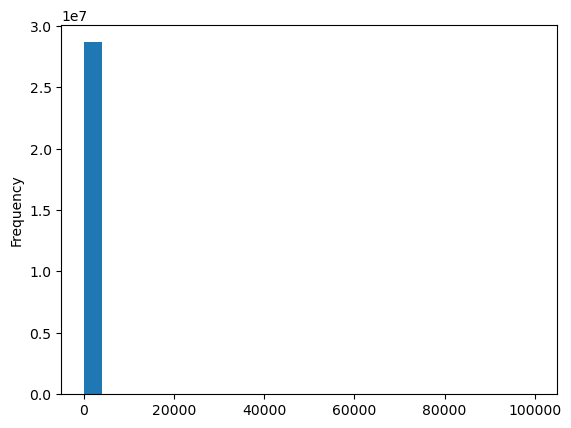

In [7]:
# create price hystogram 
ords_prods_merge['prices'].plot.hist(bins = 25)

In [8]:
#consistency check
ords_prods_merge['prices']. describe()

count    2.866805e+07
mean     1.191370e+01
std      4.923769e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

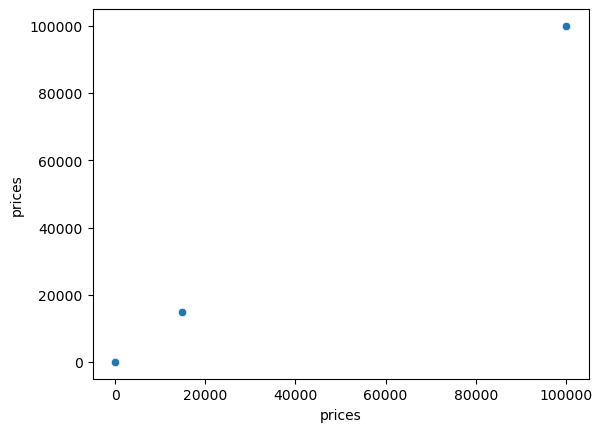

In [9]:
# create scatter plot 
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [10]:
#identification of data points above a certain threshold
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

product_id                      product_name  aisle_id  \
11587079     21553.0  Lowfat 2% Milkfat Cottage Cheese     108.0   
11587080     21553.0  Lowfat 2% Milkfat Cottage Cheese     108.0   
11587081     21553.0  Lowfat 2% Milkfat Cottage Cheese     108.0   
11587082     21553.0  Lowfat 2% Milkfat Cottage Cheese     108.0   
11587083     21553.0  Lowfat 2% Milkfat Cottage Cheese     108.0   
...              ...                               ...       ...   
19273946     33664.0             2 % Reduced Fat  Milk      84.0   
19273947     33664.0             2 % Reduced Fat  Milk      84.0   
19273948     33664.0             2 % Reduced Fat  Milk      84.0   
19273949     33664.0             2 % Reduced Fat  Milk      84.0   
19273950     33664.0             2 % Reduced Fat  Milk      84.0   

          department_id   prices   order_id   user_id  order_number  \
11587079           16.0  14900.0       43.0   39630.0          14.0   
11587080           16.0  14900.0      950.0  187854.0          16.0   
11587081           16.0  14900.0     1115.0  168014.0          15.0   
11587082           16.0  14900.0     1155.0  103747.0          22.0   
11587083           16.0  14900.0     1220.0   23475.0           3.0   
...                 ...      ...        ...       ...           ...   
19273946           16.0  99999.0  3388299.0   44229.0           2.0   
19273947           16.0  99999.0  3407607.0   14872.0          17.0   
19273948           16.0  99999.0  3414106.0  111487.0          25.0   
19273949           16.0  99999.0  3417702.0   70821.0           5.0   
19273950           16.0  99999.0  3421047.0   98554.0           4.0   

          orders_day_of_week  hour  ...  First Name  Second Name  Gender  \
11587079                 5.0  17.0  ...       Annie         Gray  Female   
11587080                 1.0  11.0  ...     Jeffrey        Xiong    Male   
11587081                 6.0  14.0  ...       Robin     Mcmillan  Female   
11587082                 1.0  13.0  ...      Joshua       Guerra    Male   
11587083                 0.0  17.0  ...      Willie        Wyatt    Male   
...                      ...   ...  ...         ...          ...     ...   
19273946                 1.0   8.0  ...       Peter        Leach    Male   
19273947                 4.0  21.0  ...     Rebecca        Burns  Female   
19273948                 6.0   7.0  ...     Lillian      Meadows  Female   
19273949                 2.0  14.0  ...        Todd        Crane    Male   
19273950                 1.0  11.0  ...      Thomas       Gentry    Male   

             State Age date_joined houshold        fam_status income USD  \
11587079   Arizona  72  12/23/2018        3           married     227151   
11587080   Montana  51   4/19/2019        3           married     528184   
11587081     Maine  77   5/21/2018        3           married     123645   
11587082     Idaho  55   4/24/2017        0            single     144653   
11587083   Indiana  34   5/20/2019        3           married     103532   
...            ...  ..         ...      ...               ...        ...   
19273946    Hawaii  53   9/23/2017        3           married     345833   
19273947  Oklahoma  75   7/22/2018        0  divorced/widowed     509944   
19273948   Alabama  34    2/9/2018        2           married     287955   
19273949  Maryland  62   3/21/2017        2           married     359053   
19273950  Nebraska  66   3/25/2017        1           married     247111   

          _merge  
11587079    both  
11587080    both  
11587081    both  
11587082    both  
11587083    both  
...          ...  
19273946    both  
19273947    both  
19273948    both  
19273949    both  
19273950    both  

[4448 rows x 32 columns]

In [11]:
# Mark treshhold data as NANs
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [12]:
# check the result 
ords_prods_merge['prices'].max()

25.0

<Axes: ylabel='Frequency'>

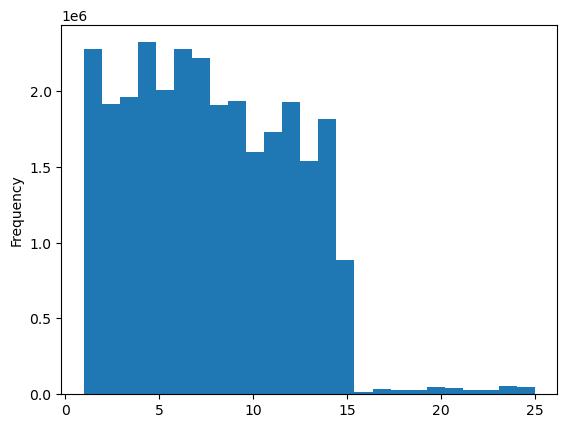

In [13]:
# create price hystogram 
ords_prods_merge['prices'].plot.hist(bins = 25)

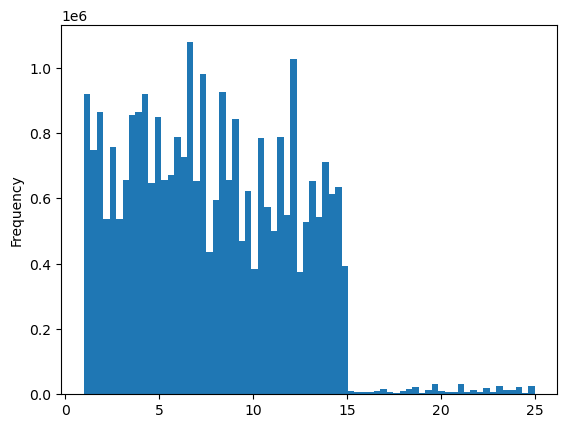

In [78]:
# change number of bins 
hyst = ords_prods_merge['prices'].plot.hist(bins = 70)

In [15]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7


In [16]:
#store 70% of sample in the df big and 30% in df small
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [17]:
# Checking the length of the original df
len(ords_prods_merge)

28668049

In [18]:
# Checking the length of big+small df's
len(big)+len(small)

28668049

In [19]:
# create df only with necessary colomns 
df_2 = small[['orders_day_of_week','prices']]

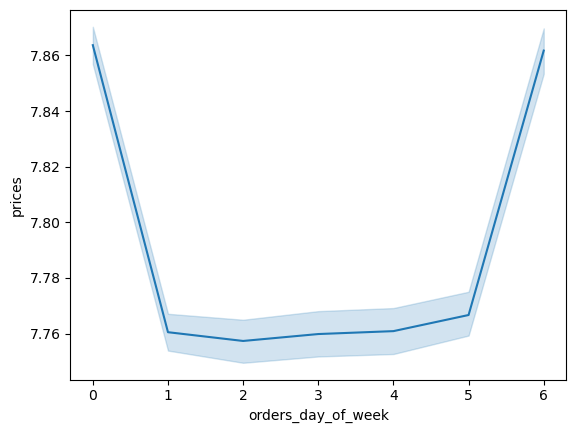

In [20]:
# create a line chart 
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

# Exercise

In [22]:
# order_hour_of_day hystogram 
ords_prods_merge

product_id                product_name  aisle_id  department_id  \
0                1.0  Chocolate Sandwich Cookies      61.0           19.0   
1                1.0  Chocolate Sandwich Cookies      61.0           19.0   
2                1.0  Chocolate Sandwich Cookies      61.0           19.0   
3                1.0  Chocolate Sandwich Cookies      61.0           19.0   
4                1.0  Chocolate Sandwich Cookies      61.0           19.0   
...              ...                         ...       ...            ...   
28668044     49688.0      Fresh Foaming Cleanser      73.0           11.0   
28668045     49688.0      Fresh Foaming Cleanser      73.0           11.0   
28668046     49688.0      Fresh Foaming Cleanser      73.0           11.0   
28668047     49688.0      Fresh Foaming Cleanser      73.0           11.0   
28668048     49688.0      Fresh Foaming Cleanser      73.0           11.0   

          prices   order_id   user_id  order_number  orders_day_of_week  hour  \
0            5.8     5319.0  196224.0          65.0                 1.0  14.0   
1            5.8     7540.0  138499.0           8.0                 0.0  14.0   
2            5.8     9228.0   79603.0           2.0                 2.0  10.0   
3            5.8     9696.0  108919.0          46.0                 5.0  16.0   
4            5.8    11140.0   63782.0           4.0                 1.0  14.0   
...          ...        ...       ...           ...                 ...   ...   
28668044    13.5  3058519.0  145732.0           4.0                 0.0   8.0   
28668045    13.5  3106363.0  197371.0          10.0                 4.0  14.0   
28668046    13.5  3111954.0   79411.0           6.0                 4.0  19.0   
28668047    13.5  3122003.0  146323.0           3.0                 1.0  16.0   
28668048    13.5  3166828.0  188073.0           7.0                 1.0  15.0   

          ...  First Name  Second Name  Gender          State Age date_joined  \
0         ...       Roger        Casey    Male       New York  48   4/29/2018   
1         ...      Andrea      Summers  Female  Massachusetts  31   3/11/2017   
2         ...    Nicholas        Logan    Male      Tennessee  65  10/27/2019   
3         ...         Bob    Robertson    Male  Massachusetts  34  12/12/2018   
4         ...        Adam       Brewer    Male         Oregon  37  11/14/2017   
...       ...         ...          ...     ...            ...  ..         ...   
28668044  ...       Julie      Carroll  Female     New Jersey  78    4/1/2019   
28668045  ...   Stephanie       Correa  Female        Alabama  62  10/25/2019   
28668046  ...      Joseph     Cisneros    Male       Arkansas  50   7/13/2019   
28668047  ...       Wayne        Stone    Male       Arkansas  52   1/29/2017   
28668048  ...       Julie       Newton  Female      Minnesota  20   1/23/2018   

         houshold                        fam_status income USD  _merge  
0               2                           married      43906    both  
1               2                           married      78505    both  
2               1                           married      51010    both  
3               0                            single      93561    both  
4               1                           married      32646    both  
...           ...                               ...        ...     ...  
28668044        3                           married     157143    both  
28668045        1                           married     128072    both  
28668046        1                           married     149398    both  
28668047        3                           married     117424    both  
28668048        2  living with parents and siblings      27577    both  

[28668049 rows x 32 columns]

<Axes: ylabel='Frequency'>

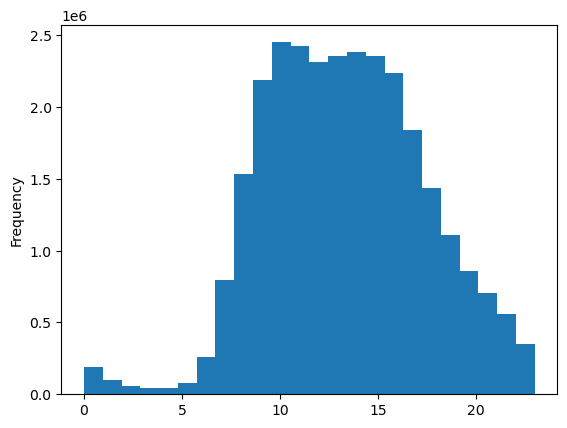

In [23]:
# order_hour_of_day hystogram 
ords_prods_merge['hour'].plot.hist(bins = 24)

Hystogram demostrates that most active hours are from 8 to 17

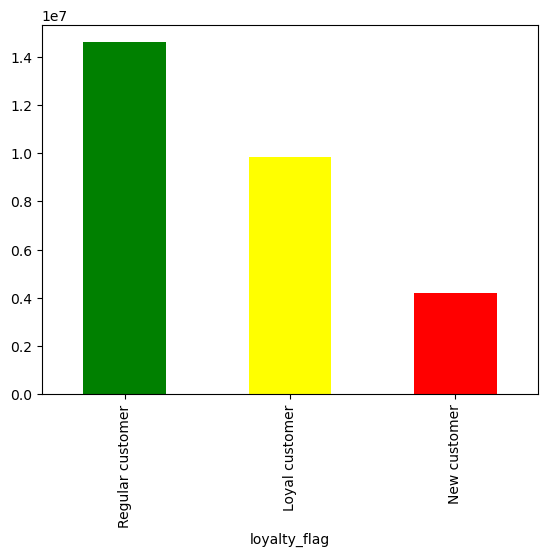

In [26]:
# Loyalty bar
bar2 = ords_prods_merge['loyalty_flag'].value_counts().plot.bar(color = ['green', 'yellow', 'red', 'blue', 'orange', 'purple', 'pink'])

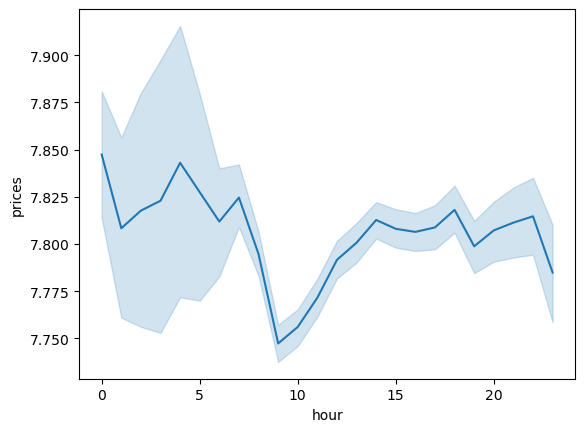

In [27]:
# create df only with the necessary columns 
df_3 = small[['hour','prices']]

# create a line chart 
line = sns.lineplot(data = df_3, x = 'hour',y = 'prices')

**Observations:**

- There is a drop in average price around hours 9 to 10, suggesting cheaper items are bought then.
- Slightly higher average prices occur early in the morning (around hours 0–6) and again from midday to evening (12–22).
- The confidence interval widens at the start and end of the day, likely due to fewer data points, increasing variability.


#### Suggestions for marketing:

- **Customers who shop early morning or late night may be buying higher-priced or specialty items.**
- **Promotions on lower-priced items could be targeted at mid-morning shoppers.**

# Exploratory analysis

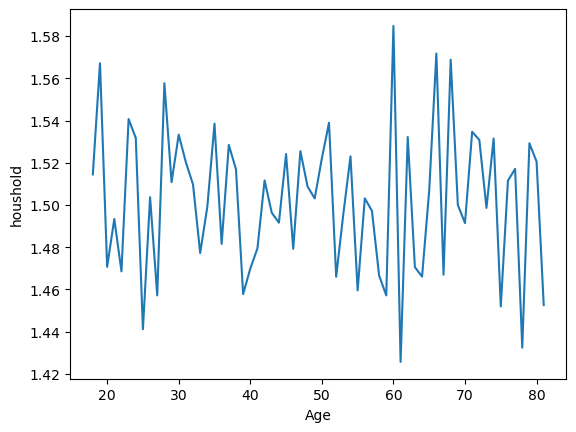

In [93]:
# connections between age and number of dependents
# Group by age and calculate the average number of dependents
grouped = small.groupby('Age')['houshold'].mean().reset_index()

# Plot
line2 = sns.lineplot(data=grouped, x='Age', y='houshold')

**Key observations:**
- The average number of dependents appears to fluctuate slightly across different ages, without a strong consistent trend.
- There is no clear upward or downward trajectory; the line is relatively flat with minor variations.
- This suggests that family situation (number of dependents) is not strongly correlated with age in this dataset.
- The variation spikes at certain ages may be due to fewer data points in those specific age groups, causing higher variability.

In [32]:
grouped

Age  houshold
0    18  1.514480
1    19  1.567097
2    20  1.470689
3    21  1.493382
4    22  1.468557
..  ...       ...
59   77  1.517084
60   78  1.432410
61   79  1.529228
62   80  1.520549
63   81  1.452565

[64 rows x 2 columns]

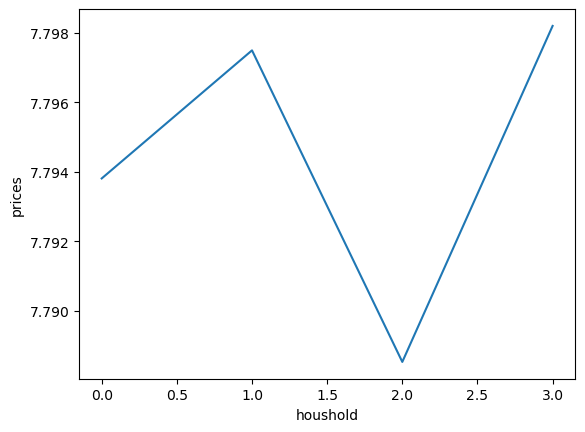

In [109]:
# connections between household and prices
# Group by household and calculate the average prices
grouped = small.groupby('houshold')['prices'].mean().reset_index()

# Plot
line3 = sns.lineplot(data=grouped, x='houshold', y='prices')

**Observations:**
- The line is relatively flat, indicating very little variation in average product prices across different household sizes.
- The average price hovers just below 7.80, showing no strong trend that suggests larger households consistently spend more or less per item.
- This implies that household size does not have a significant impact on the average price of purchased products.


In [35]:
ords_prods_merge.dtypes

product_id                 float64
product_name                object
aisle_id                   float64
department_id              float64
prices                     float64
order_id                   float64
user_id                    float64
order_number               float64
orders_day_of_week         float64
hour                       float64
days_since_prior_order     float64
add_to_cart_order          float64
reordered                  float64
price_range_loc             object
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
max_order                  float64
loyalty_flag                object
avg_value                  float64
spenders_flag               object
frequency                  float64
First Name                  object
Second Name                 object
Gender                      object
State                       object
Age                          int64
date_joined                 object
houshold            

In [106]:
# connections between household and frequency
# Group by household and calculate the average frequency
grouped = small.groupby('houshold')['frequency'].mean().reset_index()

# Plot
line4 = sns.lineplot(data=grouped, x='houshold', y='frequency')

**Key insights:**
- There is a slight increase in average purchase frequency as household size increases from 0 to 2 dependents.
- After 2 dependents, the frequency appears to plateau or slightly decline.
- This may suggest that households with up to 2 dependents shop more frequently, possibly due to growing needs, but larger households do not necessarily continue that trend.

In [115]:
## Spending by Age Group
spenders = sns.boxplot(data=small, x='spenders_flag', y='Age')
plt.title('Age Distribution by Spending Category')
plt.show()

**Interpretation:**
- **Median Age:** Both groups have nearly the same median (around 49 years), indicating that age does not heavily influence spending category.
- **Spread (IQR):** The interquartile range is also similar, suggesting that both groups cover a wide range of ages.
- **Outliers:** Both categories include younger and older outliers (ages below 20 and above 80), showing diverse age representation in both spending groups.

#### Conclusion:

**There is no significant difference in age distribution between low and high spenders. Age alone is likely not a strong predictor of spending behavior in this dataset.**

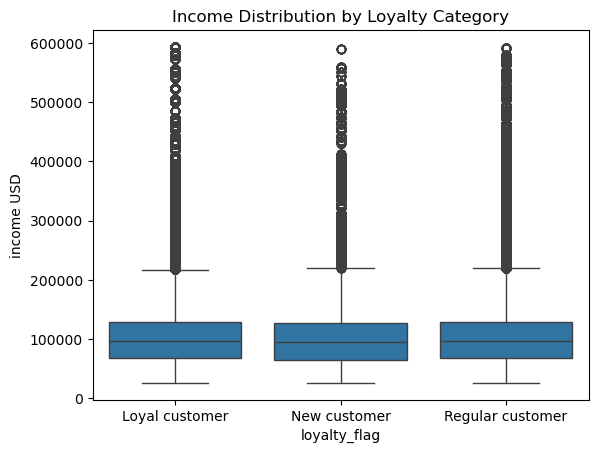

In [111]:
## Loyalty by Income
sns.boxplot(data=small, x='loyalty_flag', y='income USD')
plt.title('Income Distribution by Loyalty Category')
plt.show()

**Key observations:**
- Median income is fairly similar across all three groups, suggesting no drastic income difference by loyalty type.
- All categories have similar interquartile ranges, indicating that the central 50% of incomes are closely aligned.
- There are numerous high-income outliers in each category, especially above $200,000.
- No loyalty group dominates in terms of income level — meaning income alone might not explain loyalty behavior.

#### Conclusion:

**There doesn’t appear to be a strong link between income level and customer loyalty, so marketing efforts might need to focus on other behavioral factors (like frequency or basket size) rather than income alone.**

In [42]:
# create scatterplot age and spending power (income)
sns.scatterplot(x = 'Age', y = 'income USD',data = small)

<Axes: xlabel='Age', ylabel='income USD'>

In [137]:
def create_age_income_scatterplot(data: pd.DataFrame) -> None:
    """
    Create a scatter plot showing the relationship between age and income.
    
    Args:
        data (pd.DataFrame): DataFrame containing 'age' and 'income USD' columns
        
    Returns:
        None: Displays the scatter plot
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Age', y='income USD', data=data)
    plt.title('Relationship Between Age and Income')
    plt.xlabel('Age')
    plt.ylabel('Income (USD)')
    plt.tight_layout()

# Call the function with your dataframe
create_age_income_scatterplot(ords_prods_merge)

This scatterplot illustrates the relationship between Age and Income (USD) of customers. Here’s what it shows:
- Income values are widely spread across all ages.
- There is no clear linear correlation: higher age doesn’t consistently lead to higher or lower income.
- The density of points is greater at lower income levels, regardless of age, suggesting that most customers have moderate incomes.
- A few high-income individuals appear across all age groups, showing that high earners aren’t limited to a specific age range.

**This suggests that age is not a strong predictor of income in this dataset, which is important for marketing segmentation decisions.**


In [89]:
# save charts
line.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'line_prices_hour.png'))

In [95]:
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'age_and_number_of_dependents.png'))

In [141]:
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'loyalty_bar.png'))
line3.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'household and prices.png'))
line4.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'household and frequency.png'))
spenders.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'spenders flag.png'))


In [153]:
def create_age_income_scatterplot(
    data: pd.DataFrame,
    output_path: str,
    dpi: int = 300,
    figsize: tuple = (10, 6),
    title: str = "Relationship between Age and Income"
) -> None:
    """
    Creates and saves a scatter plot showing the relationship between age and income.
    
    Args:
        data (pd.DataFrame): DataFrame containing age and income columns.
        output_path (str): Path where the scatter plot image will be saved.
        dpi (int, optional): Resolution of the output image. Defaults to 300.
        figsize (tuple, optional): Figure size as (width, height). Defaults to (10, 6).
        title (str, optional): Title of the plot. Defaults to "Relationship between Age and Income".
        
    Returns:
        None: The function saves the plot to the specified path.
    """
    # Function implementation would go here
    pass

# Usage
create_age_income_scatterplot(
    data=ords_prods_merge,
    output_path='Jupiter/04.25 Instacart Basket Analysis/04 Analysis/Visualisations/scatter_age_income.png',
    dpi=300,
    figsize=(12, 8),
    title="Scatter Plot: Customer Age vs. Income"
)